IA & Data science (LU3IN0226) -- 2022-2023
--------
*&copy; Equipe pédagogique: Christophe Marsala, Olivier Schwander, Jean-Noël Vittaut.*

<font size="+1" color="RED"><b>[Q]</b></font> <font size="+1"><b>Indiquer dans la boîte ci-dessous vos noms et prénoms :</b></font>

*Bensadok Yanis \\
 Hami Islam*

Ce projet peut être fait en binôme (d'un même groupe). Le nom de chaque membre du binôme doit être indiqué, et un seul rendu sur un des deux comptes Moodle doit être fait.

Les groupes de plus de 2 personnes ne sont pas autorisés.

<font color="RED" size="+1"><b>[Q]</b></font> **Renommer ce fichier ipython**

Tout en haut de cette page, cliquer sur <tt>projet-1</tt> et rajouter à la suite de <tt>projet-1</tt> les noms des membres du binômes séparés par un tiret.

<font color="RED" size="+1">IMPORTANT: soumission de votre fichier final</font>

**Nom à donner au notebook** : *projet-1-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme

**Le compte-rendu doit être rendu sur la page Moodle.**

# Projet 1 - février-mars 2023


<font size="+1" color="RED"><b>Date de rendu : jeudi 22 mars, 18h au plus tard</b></font>
<br />


Vous devez compléter ce notebook en rajoutant vos expérimentations avec vos algorithmes d'apprentissage sur les 2 datasets fournis dans le répertoire data-projet:
- les données data-2D.pkl : données en 2 dimensions, 2 labels
- les données data-5D.pkl : données en 5 dimensions, 2 labels

## Travail à faire

Pour chaque ensemble de données:
- les 3 algorithmes d'apprentissage knn, perceptron et perceptron biais doivent être expérimentés et comparés (ATTENTION: on ne veut que des algorithmes que vous avez implémentés vous-même dans cette UE).
- des résultats d'expérimentations doivent fournir une comparaison des taux de bonne classification apprentissage / test avec validation croisée en 10.
- des courbes (coût, poids, variation d'accuracy,...) doivent être fournies pour étudier les modèles construits.

Vos **expérimentations doivent être expliquées**... (utilisez des boîtes Markdown pour saisir vos explications):
- une argumentation du type *"pourquoi vous avez fait cette expérimentation"* doit être fournie;
- une analyse succincte du résultat fourni doit être aussi donnée.



Par exemple (indicatif): choix de $k$ pour le knn:
- argumentation : pour décider quelle peut être la valeur de $k$ optimale, on décide de tester plusieurs valeurs différentes et de comparer les taux de bonne classification sur la base de test obtenus.
- analyse du résultat: on remarque que la valeur $k$ suivante fournie le meilleur résultat.
- étude du temps d'exécution.


## Travail à rendre
Ce qui doit être rendu : un fichier archive (`.tar`, `.tgz`, ou `.zip` uniquement) contenant uniquement ce notebook, dans lequel vous avez reporté toutes les fonctions que vous utilisez : ce notebook doit pouvoir être exécuté sans autre apport (pensez à vous en assurer avant de le rendre). Les fichiers de données ne doivent pas être inclus dans votre archive !



## Importation des data



In [13]:
%pip install pandas==1.4.1

Note: you may need to restart the kernel to use updated packages.


In [14]:
# Importation de librairies standards:
import numpy as np
import pandas as pd

# Importation de la librairie pickle
import pickle as pkl

# Importation de la librairie matplotlib
import matplotlib.pyplot as plt

# Importation de la librairie time
import time

# lecture des donnéees en dimension 2 dans un dataframe pandas
data2D = pkl.load(open('data-projet/data-2D.pkl', 'rb')) 
X2D = np.array(data2D[['x1', 'x2']], dtype=float) # conversion de type pour une meilleure compatibilité
Y2D = np.array(data2D['label'], dtype=float)

# pour les données en dimension 5, la méthode est la même, modifier seulement les noms des colonnes

**Les classifiers et méthodes sont directement intégrés dans le notebook pour gagner en temps CPU mais aussi corrigé les erreurs rapidement**

In [15]:
class Classifier:
    """ Classe (abstraite) pour représenter un classifieur
        Attention: cette classe est ne doit pas être instanciée.
    """
    
    def __init__(self, input_dimension):
        """ Constructeur de Classifier
            Argument:
                - intput_dimension (int) : dimension de la description des exemples
            Hypothèse : input_dimension > 0
        """
        
    def train(self, desc_set, label_set):
        """ Permet d'entrainer le modele sur l'ensemble donné
            desc_set: ndarray avec des descriptions
            label_set: ndarray avec les labels correspondants
            Hypothèse: desc_set et label_set ont le même nombre de lignes
        """        
    
    def score(self,x):
        """ rend le score de prédiction sur x (valeur réelle)
            x: une description
        """
    
    def predict(self, x):
        """ rend la prediction sur x (soit -1 ou soit +1)
            x: une description
        """

    def accuracy(self, desc_set, label_set):
        """ Permet de calculer la qualité du système sur un dataset donné
            desc_set: ndarray avec des descriptions
            label_set: ndarray avec les labels correspondants
            Hypothèse: desc_set et label_set ont le même nombre de lignes
        """
        # ------------------------------
        # COMPLETER CETTE FONCTION ICI : 
        label_predict = []
        for i in range(len(desc_set)):
          label_predict.append(self.predict(desc_set[i]))
        
        accuracy= np.mean(np.array(label_predict)==np.array(label_set))
        return accuracy

##############################################################

class ClassifierKNN(Classifier):
    """ Classe pour représenter un classifieur par K plus proches voisins.
        Cette classe hérite de la classe Classifier
    """

    # ATTENTION : il faut compléter cette classe avant de l'utiliser !
    
    def __init__(self, input_dimension, k):
        """ Constructeur de Classifier
            Argument:
                - intput_dimension (int) : dimension d'entrée des exemples
                - k (int) : nombre de voisins à considérer
            Hypothèse : input_dimension > 0
        """
        super().__init__(input_dimension)
        self.k = k 

    def score(self,x):
        """ rend la proportion de +1 parmi les k ppv de x (valeur réelle)
            x: une description : un ndarray
        """
        
        dist = np.linalg.norm(self.desc_set-x, axis= 1)
        argSorted = np.argsort(dist) # Returns the indices that would sort an array
                
        
        proportionClass1 = np.sum(self.label_set[argSorted[:self.k]]==1)
        return 2*(proportionClass1 / self.k - 0.5)
        

    
    def predict(self, x):
        """ rend la prediction sur x (-1 ou +1)
            x: une description : un ndarray
        """
        if(self.score(x)>0):
          return 1
        else:
          return -1
    def train(self, desc_set, label_set):
        """ Permet d'entrainer le modele sur l'ensemble donné
            desc_set: ndarray avec des descriptions
            label_set: ndarray avec les labels correspondants
            Hypothèse: desc_set et label_set ont le même nombre de lignes
        """    
        self.desc_set=desc_set
        self.label_set=label_set 

##############################################################

class ClassifierPerceptron(Classifier):
    """ Perceptron de Rosenblatt
    """
    def __init__(self, input_dimension, learning_rate=0.01, init=True ):
        """ Constructeur de Classifier
            Argument:
                - input_dimension (int) : dimension de la description des exemples (>0)
                - learning_rate (par défaut 0.01): epsilon
                - init est le mode d'initialisation de w: 
                    - si True (par défaut): initialisation à 0 de w,
                    - si False : initialisation par tirage aléatoire de valeurs petites
        """
        self.input_dimension=input_dimension
        self.learning_rate=learning_rate
        if(init):
          self.w=np.zeros(input_dimension)
        else:
          v=np.random.uniform(0,1,input_dimension)
          v=(2*v-1)*0.001
          self.w=v.copy()
        self.allw = [self.w.copy()]
        
    def train_step(self, desc_set, label_set):
        """ Réalise une unique itération sur tous les exemples du dataset
            donné en prenant les exemples aléatoirement.
            Arguments:
                - desc_set: ndarray avec des descriptions
                - label_set: ndarray avec les labels correspondants
        """        
        index_list =[i for i in range(len(desc_set))]
        np.random.shuffle(index_list)

        for i in index_list :
          xi = desc_set[i]
          yHut = np.dot(xi,self.w)
          yi = label_set[i]
          if not (yHut<0 and label_set[i]==-1) and not(yHut>0 and label_set[i]==1) :
            self.w =self.w + np.dot(self.learning_rate*yi,xi)
            self.allw.append(self.w.copy())
        
     
    def train(self, desc_set, label_set, nb_max=100, seuil=0.001):
        """ Apprentissage itératif du perceptron sur le dataset donné.
            Arguments:
                - desc_set: ndarray avec des descriptions
                - label_set: ndarray avec les labels correspondants
                - nb_max (par défaut: 100) : nombre d'itérations maximale
                - seuil (par défaut: 0.001) : seuil de convergence
            Retour: la fonction rend une liste
                - liste des valeurs de norme de différences
        """    
        diff_list = []
        i = 0 

        w0= self.w.copy()
        self.train_step(desc_set , label_set ) 
        norme = np.linalg.norm(w0-self.w)
        diff_list.append(norme)
        
        while ( i != nb_max and norme > seuil) :
          i += 1
          w0 = self.w.copy()
          self.train_step(desc_set , label_set ) 
          norme = np.linalg.norm(w0-self.w)
          diff_list.append(norme)

        return diff_list  
    def score(self,x):
        """ rend le score de prédiction sur x (valeur réelle)
            x: une description
        """
        return np.dot(x,self.w)
    
    def predict(self, x):
        """ rend la prediction sur x (soit -1 ou soit +1)
            x: une description
        """
        y_chap=self.score(x)
        if(y_chap<=0):
          return -1
        else:
          return 1

    def get_allw(self):
      return self.allw
    
##############################################################

class ClassifierPerceptronBiais(ClassifierPerceptron):
    """ Perceptron de Rosenblatt avec biais
        Variante du perceptron de base
    """
    def __init__(self, input_dimension, learning_rate=0.01, init=True):
        """ Constructeur de Classifier
            Argument:
                - input_dimension (int) : dimension de la description des exemples (>0)
                - learning_rate (par défaut 0.01): epsilon
                - init est le mode d'initialisation de w: 
                    - si True (par défaut): initialisation à 0 de w,
                    - si False : initialisation par tirage aléatoire de valeurs petites
        """
        # Appel du constructeur de la classe mère
        super().__init__(input_dimension, learning_rate, init)
        # Affichage pour information (décommentez pour la mise au point)
        # print("Init perceptron biais: w= ",self.w," learning rate= ",learning_rate)
        
    def train_step(self, desc_set, label_set):
        """ Réalise une unique itération sur tous les exemples du dataset
            donné en prenant les exemples aléatoirement.
            Arguments:
                - desc_set: ndarray avec des descriptions
                - label_set: ndarray avec les labels correspondants
        """        
        ### A COMPLETER !
        index_list =[i for i in range(len(desc_set))]
        np.random.shuffle(index_list)

        for i in index_list :
          xi = desc_set[i]
          yi = label_set[i]
          if ((self.score(xi) * yi ) < 1 ):
            self.w =self.w + ((yi - self.score(xi)) * xi) * self.learning_rate
            self.allw.append(self.w.copy())

##############################################################

def crossval(X, Y, n_iterations, iteration):
    Xtest = X[iteration * len(X) // n_iterations : ((iteration + 1)*len(X)// n_iterations)]
    Ytest = Y[iteration * len(Y) // n_iterations : ((iteration + 1)*len(Y)// n_iterations)]

    Xapp1 = X[:iteration * len(X) // n_iterations ] 
    Xapp2=  X[((iteration + 1)*len(X)// n_iterations):]

    Xapp = np.concatenate(( np.array(Xapp1) , np.array(Xapp2)))

    Yapp1 = Y[:iteration * len(X) // n_iterations ] 
    Yapp2=  Y[((iteration + 1)*len(X)// n_iterations):]


    Yapp = np.concatenate(( np.array(Yapp1) , np.array(Yapp2))) 
    return Xapp, Yapp,Xtest, Ytest

def crossval_strat(X, Y, n_iterations, iteration):

    XtrainPos , YtrainPos , XtestPos , YtestPos = crossval(X[Y==1],Y[Y==1],n_iterations,iteration)
    XtrainNeg , YtrainNeg , XtestNeg , YtestNeg = crossval(X[Y==-1],Y[Y==-1],n_iterations,iteration)
    Xapp = np.concatenate((XtrainPos,XtrainNeg))
    Yapp = np.concatenate((YtrainPos,YtrainNeg))
    Xtest = np.concatenate((XtestPos,XtestNeg))
    Ytest = np.concatenate((YtestPos,YtestNeg))
    
    return Xapp, Yapp, Xtest, Ytest

def analyse_perfs(L):
    """ L : liste de nombres réels non vide
        rend le tuple (moyenne, écart-type)
    """
    return np.mean(L),np.var(L) 

def plot_frontiere(desc_set, label_set, classifier, step=30):
    """ desc_set * label_set * Classifier * int -> NoneType
        Remarque: le 4e argument est optionnel et donne la "résolution" du tracé: plus il est important
        et plus le tracé de la frontière sera précis.        
        Cette fonction affiche la frontière de décision associée au classifieur
    """
    mmax=desc_set.max(0)
    mmin=desc_set.min(0)
    x1grid,x2grid=np.meshgrid(np.linspace(mmin[0],mmax[0],step),np.linspace(mmin[1],mmax[1],step))
    grid=np.hstack((x1grid.reshape(x1grid.size,1),x2grid.reshape(x2grid.size,1)))
    
    # calcul de la prediction pour chaque point de la grille
    res=np.array([classifier.predict(grid[i,:]) for i in range(len(grid)) ])
    res=res.reshape(x1grid.shape)
    # tracer des frontieres
    # colors[0] est la couleur des -1 et colors[1] est la couleur des +1
    plt.contourf(x1grid,x2grid,res,colors=["darksalmon","skyblue"],levels=[-1000,0,1000])

def plot2DSet(desc,labels):    
    """ ndarray * ndarray -> affichage
        la fonction doit utiliser la couleur 'red' pour la classe -1 et 'blue' pour la +1
    """
    data2_negatifs = desc[labels == -1]
    data2_positifs = desc[labels == +1]
    plt.scatter(data2_negatifs[:,0],data2_negatifs[:,1],marker='o', color="red")
    plt.scatter(data2_positifs[:,0],data2_positifs[:,1],marker='x', color="blue")

# **Expérimentation data 2D**

## **Classifier KNN**


In [16]:

#time cpu knn
time_knn_park = {}

#classifier 
k = 1 #nombre de voisin pour knn
#Création de knn
knn = ClassifierKNN(2,k)

# crossval
# k_seuil = len(X2D)// 2
k_seuil = 1500
niter = 10

dict_accuracy_test = {}
ecart_type = {}
#melange 
index = np.random.permutation(len(X2D))
X2DMelange = X2D[index]
Y2DMelange = Y2D[index]
for k in range(1,k_seuil,10):
  accuracy_test = []
  start_time = time.time()
  for i in range(niter):
    #crossval
    Xapp,Yapp,Xtest,Ytest = crossval_strat(X2DMelange, Y2DMelange, niter, i)
    knn = ClassifierKNN(2,k)
    knn.train(Xapp,Yapp)
    #calcul de l'accuracy
    accuracy_test.append(knn.accuracy(Xtest,Ytest))
    # print("Accuracy test: ", accuracy_test , "pour k = ",k)
  dict_accuracy_test[k],ecart_type[k] = analyse_perfs(accuracy_test)
  end_time = time.time()
  time_knn_park[k] = end_time - start_time 
print(dict_accuracy_test)

# Le meilleur k
kb = max(dict_accuracy_test, key=dict_accuracy_test.get)
print(kb)


{1: 0.884, 11: 0.9209999999999999, 21: 0.924, 31: 0.9225000000000001, 41: 0.9215000000000002, 51: 0.923, 61: 0.9209999999999999, 71: 0.9219999999999999, 81: 0.9225, 91: 0.923, 101: 0.9235, 111: 0.923, 121: 0.9225000000000001, 131: 0.925, 141: 0.9245000000000001, 151: 0.9240000000000002, 161: 0.9240000000000002, 171: 0.924, 181: 0.9245000000000001, 191: 0.9225, 201: 0.922, 211: 0.923, 221: 0.9215, 231: 0.922, 241: 0.922, 251: 0.9215000000000002, 261: 0.9215000000000002, 271: 0.9225000000000001, 281: 0.9225000000000001, 291: 0.9215000000000002, 301: 0.921, 311: 0.9195, 321: 0.9195, 331: 0.9190000000000002, 341: 0.9190000000000002, 351: 0.9185000000000001, 361: 0.9195, 371: 0.9185000000000001, 381: 0.9185000000000001, 391: 0.9185000000000001, 401: 0.9185000000000001, 411: 0.9185000000000001, 421: 0.9189999999999999, 431: 0.9189999999999999, 441: 0.9195, 451: 0.9199999999999999, 461: 0.9199999999999999, 471: 0.9194999999999999, 481: 0.9194999999999999, 491: 0.9199999999999999, 501: 0.91999

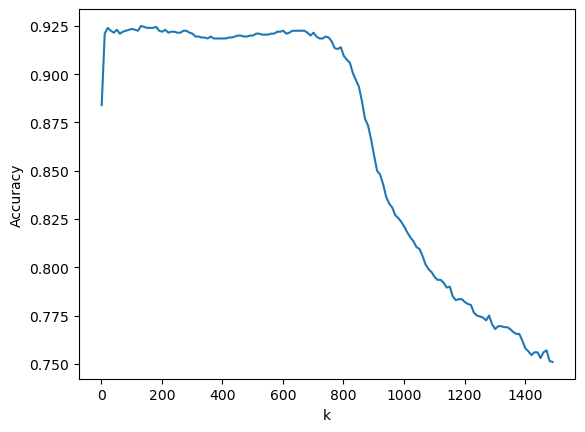

In [17]:
#La courbe de l'accuracy 
# Tracer de la courbe des variations


plt.plot(dict_accuracy_test.keys() , dict_accuracy_test.values() )  
plt.ylabel('Accuracy')
plt.xlabel("k")
plt.show()

**Analyse :** 
La valeur de k qui donne un bon taux de classification est entre 21 et 200 , d'aprés les résultat de notre expérimentation le meilleur k est dans le voisinage de 21

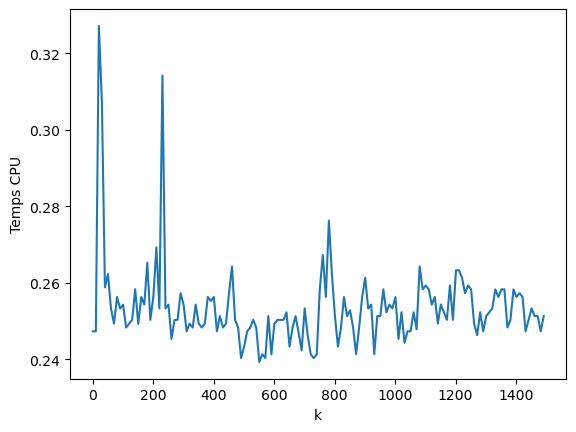

In [18]:
#La courbe du temps d'éxecution
plt.plot(time_knn_park.keys(), time_knn_park.values())
plt.ylabel('Temps CPU')
plt.xlabel("k")
plt.show()

**Analyse :**

Nous remarquons que le temps d 'execution croit avec l'évolution de K puisque pour un K plus grand le modéle doit considerer plus de voisins ce qui implique un traitement plus important donc un temps d'éxécution en plus 

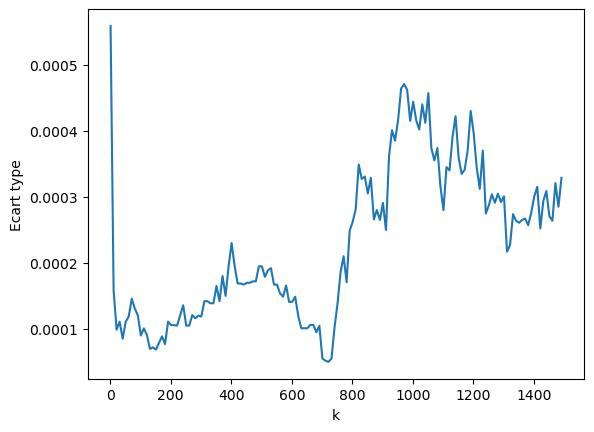

In [19]:
# L'écart type 
plt.plot(ecart_type.keys(),ecart_type.values())
plt.ylabel("Ecart type")
plt.xlabel("k")
plt.show()

**Analyse :**
On remarque que l'ecart type prend des petites valeurs et augmente globalement ce qui donne un indice sur la robustesse du modéle et montre que notre modéle ne dépend pas du jeux de données et on remarque plus le k est grand plus l'ecart type est élevé

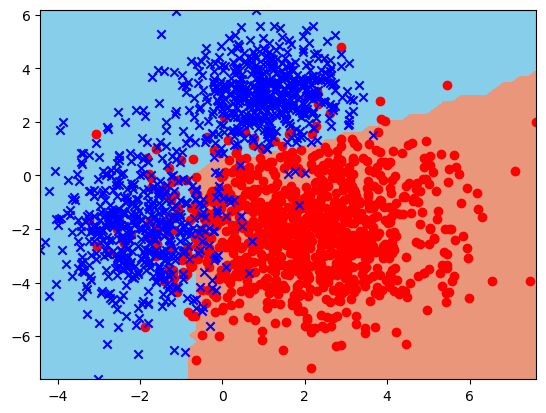

In [20]:
#Affichage de la frontière de séparation des classes pour la meilleure valeur de k trouvée précédemment
classifierKNN2 = ClassifierKNN(2,kb)
niter = 10
classifierKNN2.train(X2D, Y2D)
plot_frontiere(X2D,Y2D,classifierKNN2,step=60)
plot2DSet(X2D,Y2D)

## **Classifier Perceptron**


### **Perceptron vecteur initialisé à nul**

**L'Accuracy, l'écart-type et le temps CPU en fonction du learning rate**


In [21]:
#Accuracy, Ecart-type et CPU time
np.random.seed(42) 

learning_rate_list = np.linspace(0.001, 0.01, 100)

dict_lr_acc = {}
dict_lr_et  = {}
dict_lr_time= {}

for lr in learning_rate_list :
  list_accuracy = []
  start_time = time.time()
  for i in range(niter):
      Xapp,Yapp,Xtest,Ytest = crossval_strat(X2DMelange, Y2DMelange, niter, i)
      perceptron4 = ClassifierPerceptron(2, lr, init=True)
      
      perceptron4.train(Xapp, Yapp)
      list_accuracy.append(perceptron4.accuracy(Xtest, Ytest))
    
  end_time = time.time()
  dict_lr_time[lr] = end_time - start_time

  dict_lr_acc[lr], dict_lr_et[lr] = analyse_perfs(list_accuracy)


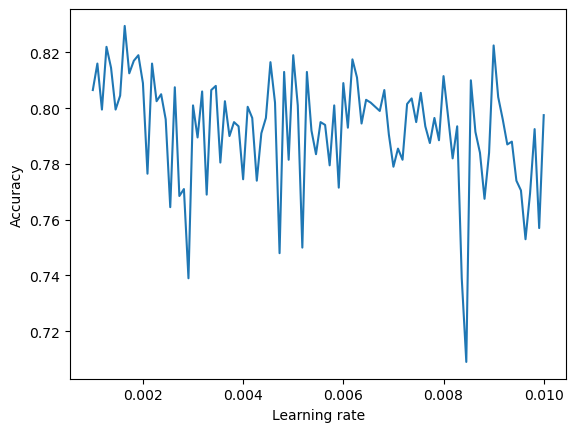

In [22]:
# Accuracy en fonction du learning rate
plt.plot( dict_lr_acc.keys() , dict_lr_acc.values())
plt.ylabel("Accuracy")
plt.xlabel("Learning rate")
plt.show()

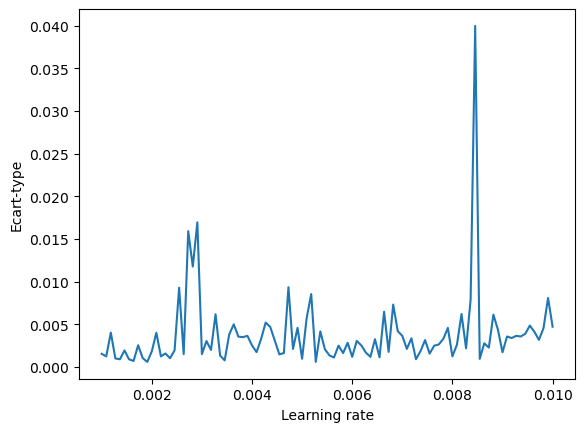

In [23]:
# Ecart-type en fonction du learning rate
plt.plot( dict_lr_et.keys() , dict_lr_et.values())
plt.ylabel("Ecart-type")
plt.xlabel("Learning rate")
plt.show()

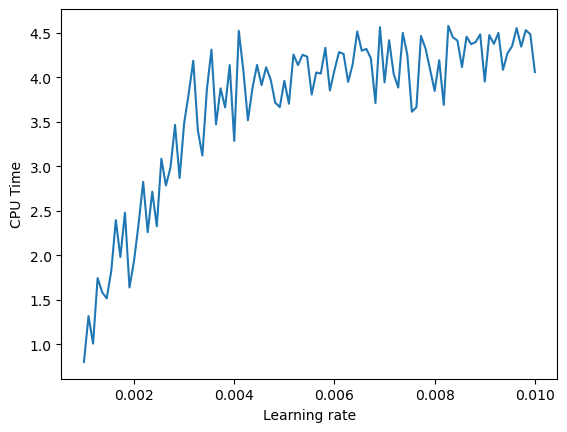

In [24]:
# CPU Time
plt.plot( dict_lr_time.keys() , dict_lr_time.values())
plt.ylabel("CPU Time")
plt.xlabel("Learning rate")
plt.show()

**Le poids**

In [25]:
# Learning rate optimal
lr = max(dict_lr_acc, key=dict_lr_acc.get)
print(lr)

0.0016363636363636363


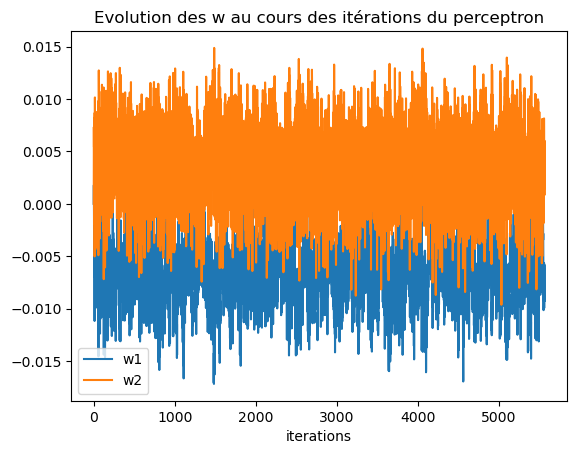

In [26]:
perceptron = ClassifierPerceptron(2, learning_rate=lr, init=True)

les_differences = perceptron.train(X2DMelange, Y2DMelange ,nb_max=1000)

# récupération de l'évolution des w au cours de l'apprentissage 
# perceptron initialisé à 0
# si allw est sous forme de liste de couples [w1, w2], on doit la convertir en np.array pour la suite:
allw = np.array(perceptron.get_allw()) 
# print(allw)

# Tracé de l'évolution des w:
plt.figure()
plt.plot(allw[:,0]) # première coordonnée du vecteur poids: w1
plt.plot(allw[:,1]) # deuxième coordonnée du vecteur poids: w2
plt.title('Evolution des w au cours des itérations du perceptron')
plt.xlabel('iterations')
plt.legend(['w1','w2'])

**Le coût**

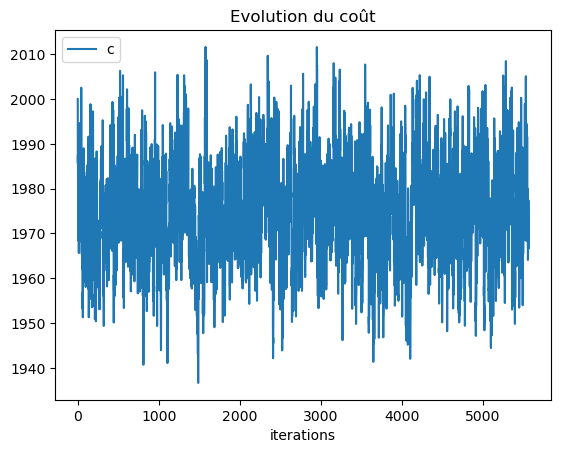

In [27]:
# Le coût 
allw = np.array(perceptron.get_allw()) 

def calculCout(w):
  c=0
  for i in range(len(X2DMelange)):
    fx = np.dot(X2DMelange[i],w)
    if (1-fx*Y2DMelange[i]) > 0 :
      c=c+(1-fx*Y2DMelange[i])
  return c


def evolCout(allw):
  cout=[]
  for i in range(len(allw)):
    w=allw[i].copy()
    couti = calculCout(w)
    cout.append(couti)
  return cout

Cout=evolCout(allw)
plt.figure()
plt.plot(Cout)
plt.title('Evolution du coût')
plt.xlabel('iterations')
plt.legend('coût')

### **Perceptron vecteur initialisé non nul**

In [28]:
#Accuracy, Ecart-type et CPU time
np.random.seed(42) 

learning_rate_list = np.linspace(0.001, 0.01, 100)

dict_lr_acc = {}
dict_lr_et  = {}
dict_lr_time= {}

for lr in learning_rate_list :
  list_accuracy = []
  start_time = time.time()
  for i in range(niter):
      Xapp,Yapp,Xtest,Ytest = crossval_strat(X2DMelange, Y2DMelange, niter, i)
      perceptron4 = ClassifierPerceptron(2, lr, init=False)
      
      perceptron4.train(Xapp, Yapp)
      list_accuracy.append(perceptron4.accuracy(Xtest, Ytest))
    
  end_time = time.time()
  dict_lr_time[lr] = end_time - start_time

  dict_lr_acc[lr], dict_lr_et[lr] = analyse_perfs(list_accuracy)


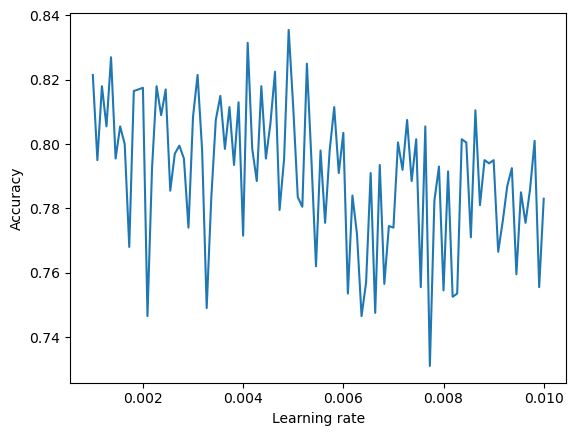

In [29]:
# Accuracy en fonction du learning rate
plt.plot( dict_lr_acc.keys() , dict_lr_acc.values())
plt.ylabel("Accuracy")
plt.xlabel("Learning rate")
plt.show()

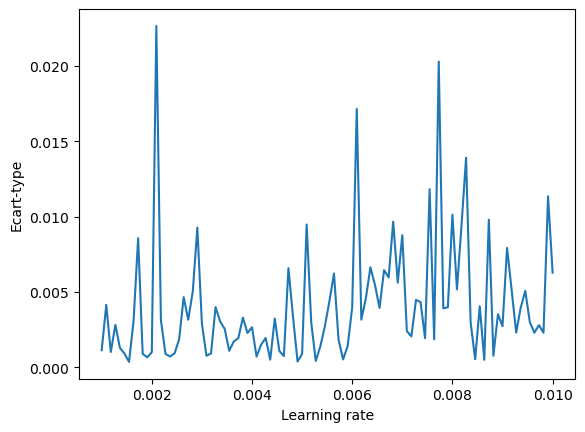

In [30]:
# Ecart-type en fonction du learning rate
plt.plot( dict_lr_et.keys() , dict_lr_et.values())
plt.ylabel("Ecart-type")
plt.xlabel("Learning rate")
plt.show()

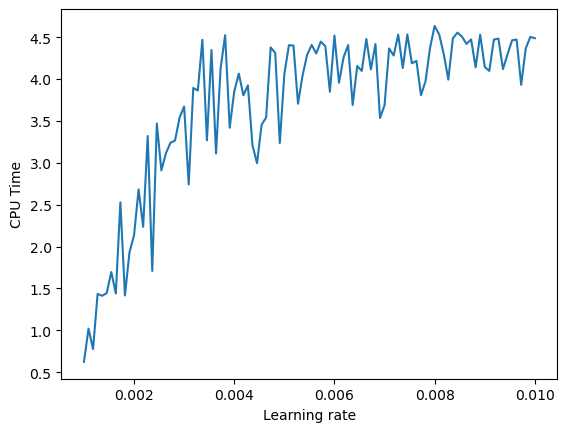

In [31]:
# CPU Time
plt.plot( dict_lr_time.keys() , dict_lr_time.values())
plt.ylabel("CPU Time")
plt.xlabel("Learning rate")
plt.show()

**Analyse**
Nous remarquons que le temps d'execution est plus optimal lorsqu'on fait une initialisation aléatoire de W, car pour une initalisation aléatoire le modéle peut apprendre de maniére plus efficace

In [32]:
# Le Poids
lr = max(dict_lr_acc, key=dict_lr_acc.get)
print(lr)

0.00490909090909091


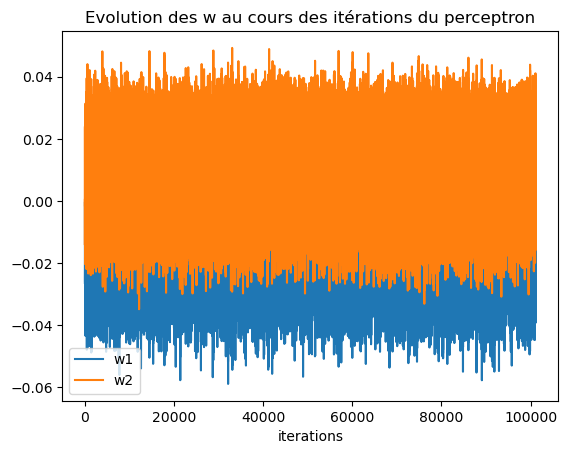

In [33]:
perceptron = ClassifierPerceptron(2, learning_rate=lr, init=False)

les_differences = perceptron.train(X2DMelange, Y2DMelange ,nb_max=1000)

# récupération de l'évolution des w au cours de l'apprentissage 
# perceptron initialisé à 0
# si allw est sous forme de liste de couples [w1, w2], on doit la convertir en np.array pour la suite:
allw = np.array(perceptron.get_allw()) 
# print(allw)

# Tracé de l'évolution des w:
plt.figure()
plt.plot(allw[:,0]) # première coordonnée du vecteur poids: w1
plt.plot(allw[:,1]) # deuxième coordonnée du vecteur poids: w2
plt.title('Evolution des w au cours des itérations du perceptron')
plt.xlabel('iterations')
plt.legend(['w1','w2'])

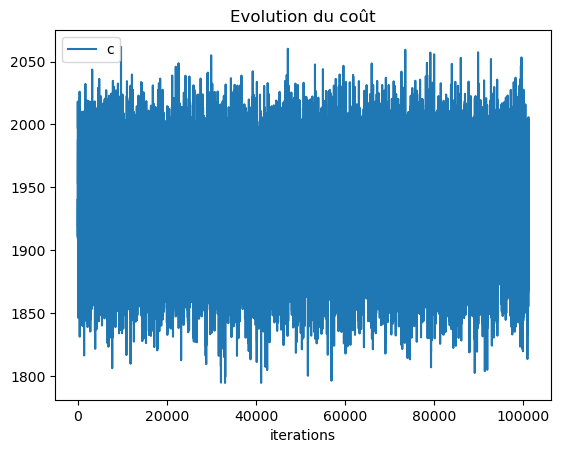

In [34]:
Cout=evolCout(allw)
plt.figure()
plt.plot(Cout)
plt.title('Evolution du coût')
plt.xlabel('iterations')
plt.legend('coût')

## **Classifier Perceptron Biais**

### **Perceptron Biais vecteur initialisé à nul**

W

In [36]:
#Accuracy, Ecart-type et CPU time
np.random.seed(42) 

learning_rate_list = np.linspace(0.001, 0.01, 100)

dict_lr_acc_biais = {}
dict_lr_et_biais  = {}


dict_lr_time_biais= {}

for lr in learning_rate_list :
  list_accuracy = []
  start_time = time.time()
  for i in range(niter):
      Xapp,Yapp,Xtest,Ytest = crossval_strat(X2DMelange, Y2DMelange, niter, i)
      perceptronb = ClassifierPerceptronBiais(2, lr, init=True)
      
      perceptronb.train(Xapp, Yapp)
      list_accuracy.append(perceptronb.accuracy(Xtest, Ytest))
    
  end_time = time.time()
  dict_lr_time_biais[lr] = end_time - start_time

  dict_lr_acc_biais[lr], dict_lr_et_biais[lr] = analyse_perfs(list_accuracy)


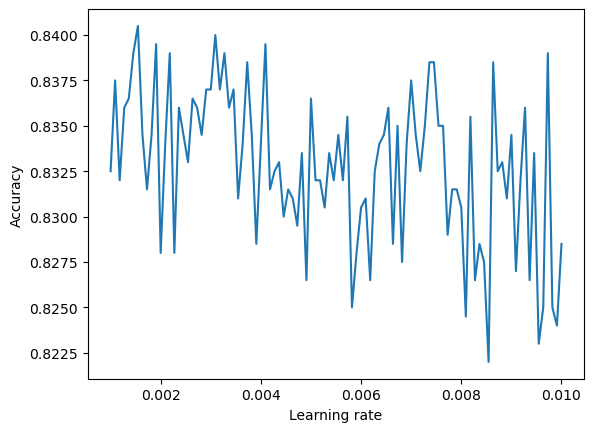

In [37]:
# Accuracy 
plt.plot( dict_lr_acc_biais.keys() , dict_lr_acc_biais.values())
plt.ylabel("Accuracy")
plt.xlabel("Learning rate")
plt.show()

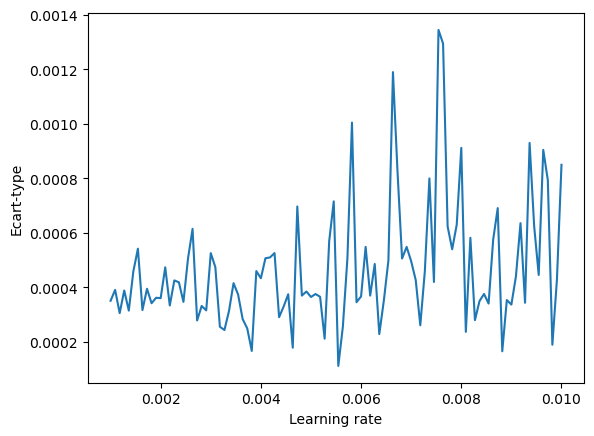

In [38]:
# Ecart-type en fonction du learning rate
plt.plot( dict_lr_et_biais.keys() , dict_lr_et_biais.values())
plt.ylabel("Ecart-type")
plt.xlabel("Learning rate")
plt.show()

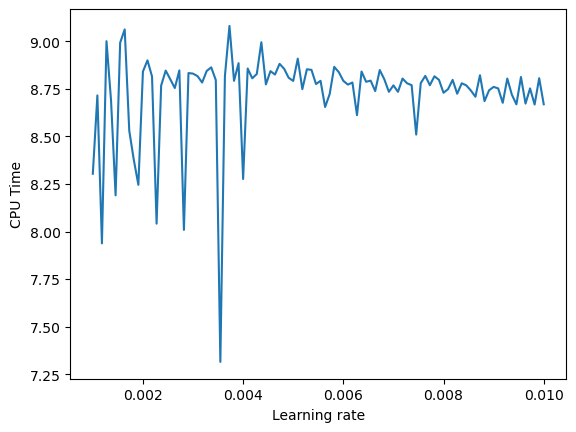

In [39]:
# CPU Time
plt.plot( dict_lr_time_biais.keys() , dict_lr_time_biais.values())
plt.ylabel("CPU Time")
plt.xlabel("Learning rate")
plt.show()

In [40]:
# Le Poids 
lr_biais = max(dict_lr_acc_biais, key=dict_lr_acc_biais.get)
print(lr_biais)

0.0015454545454545456


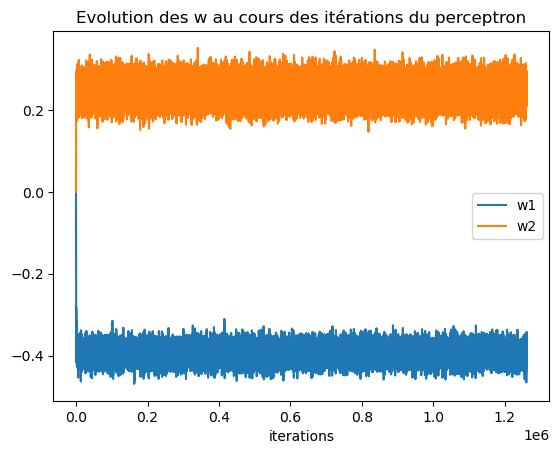

In [41]:
perceptron_biais = ClassifierPerceptronBiais(2, learning_rate=lr_biais, init=True)

les_differences = perceptron_biais.train(X2DMelange, Y2DMelange ,nb_max=1000)

# récupération de l'évolution des w au cours de l'apprentissage 
# perceptron initialisé à 0
# si allw est sous forme de liste de couples [w1, w2], on doit la convertir en np.array pour la suite:
allw_biais = np.array(perceptron_biais.get_allw()) 
# print(allw)

# Tracé de l'évolution des w:
plt.figure()
plt.plot(allw_biais[:,0]) # première coordonnée du vecteur poids: w1
plt.plot(allw_biais[:,1]) # deuxième coordonnée du vecteur poids: w2
plt.title('Evolution des w au cours des itérations du perceptron')
plt.xlabel('iterations')
plt.legend(['w1','w2'])

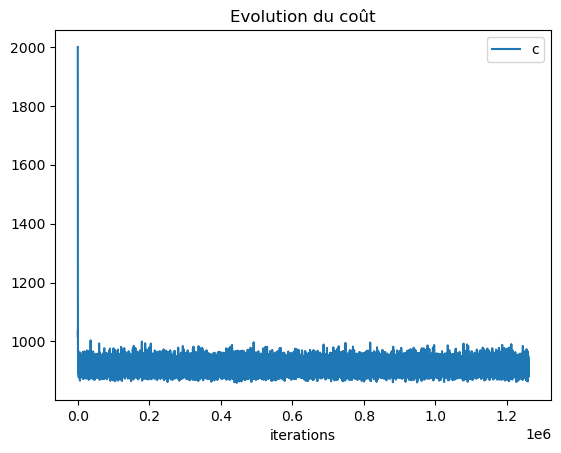

In [42]:
#Coût
Cout=evolCout(allw_biais)
plt.figure()
plt.plot(Cout)
plt.title('Evolution du coût')
plt.xlabel('iterations')
plt.legend('coût')

### **Perceptron Biais vecteur initialisé non nul**

In [43]:
#Accuracy, Ecart-type et CPU time
np.random.seed(42) 

learning_rate_list = np.linspace(0.001, 0.01, 100)

dict_lr_acc_biais = {}
dict_lr_et_biais  = {}
dict_lr_time_biais= {}

for lr in learning_rate_list :
  list_accuracy = []
  start_time = time.time()
  for i in range(niter):
      Xapp,Yapp,Xtest,Ytest = crossval_strat(X2DMelange, Y2DMelange, niter, i)
      perceptronb = ClassifierPerceptronBiais(2, lr, init=False)
      
      perceptronb.train(Xapp, Yapp)
      list_accuracy.append(perceptronb.accuracy(Xtest, Ytest))
    
  end_time = time.time()
  dict_lr_time_biais[lr] = end_time - start_time

  dict_lr_acc_biais[lr], dict_lr_et_biais[lr] = analyse_perfs(list_accuracy)


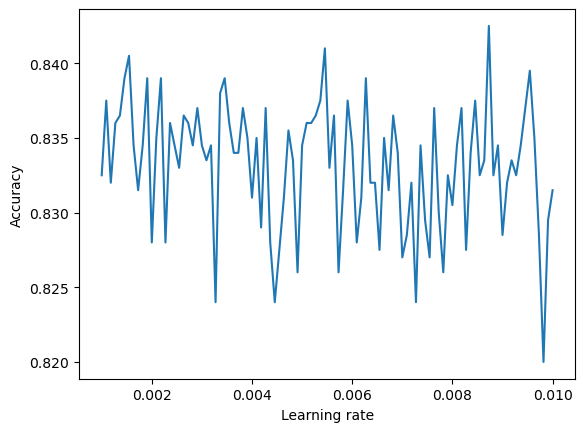

In [44]:
# Accuracy 
plt.plot( dict_lr_acc_biais.keys() , dict_lr_acc_biais.values())
plt.ylabel("Accuracy")
plt.xlabel("Learning rate")
plt.show()

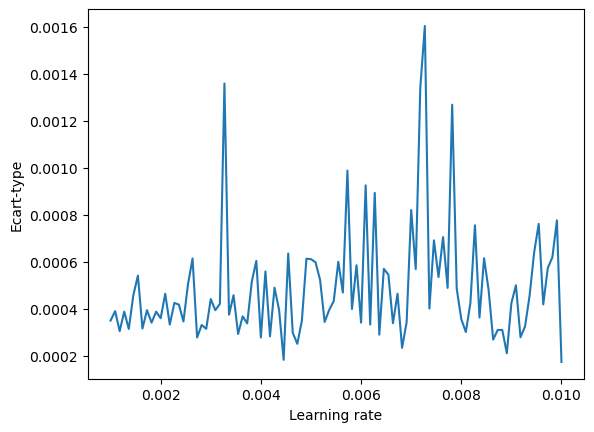

In [45]:
# Ecart-type en fonction du learning rate
plt.plot( dict_lr_et_biais.keys() , dict_lr_et_biais.values())
plt.ylabel("Ecart-type")
plt.xlabel("Learning rate")
plt.show()

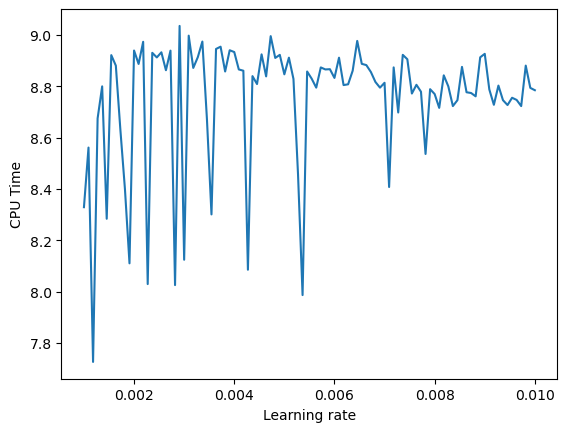

In [46]:
# CPU Time
plt.plot( dict_lr_time_biais.keys() , dict_lr_time_biais.values())
plt.ylabel("CPU Time")
plt.xlabel("Learning rate")
plt.show()

In [47]:
# Le Poids 
lr_biais = max(dict_lr_acc_biais, key=dict_lr_acc_biais.get)
print(lr_biais)

0.008727272727272728


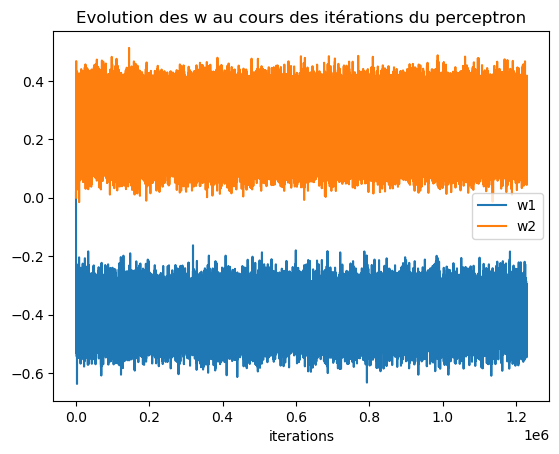

In [48]:
perceptron_biais = ClassifierPerceptronBiais(2, learning_rate=lr_biais, init=False)

les_differences = perceptron_biais.train(X2DMelange, Y2DMelange ,nb_max=1000)

# récupération de l'évolution des w au cours de l'apprentissage 
# perceptron initialisé à 0
# si allw est sous forme de liste de couples [w1, w2], on doit la convertir en np.array pour la suite:
allw_biais = np.array(perceptron_biais.get_allw()) 
# print(allw)

# Tracé de l'évolution des w:
plt.figure()
plt.plot(allw_biais[:,0]) # première coordonnée du vecteur poids: w1
plt.plot(allw_biais[:,1]) # deuxième coordonnée du vecteur poids: w2
plt.title('Evolution des w au cours des itérations du perceptron')
plt.xlabel('iterations')
plt.legend(['w1','w2'])

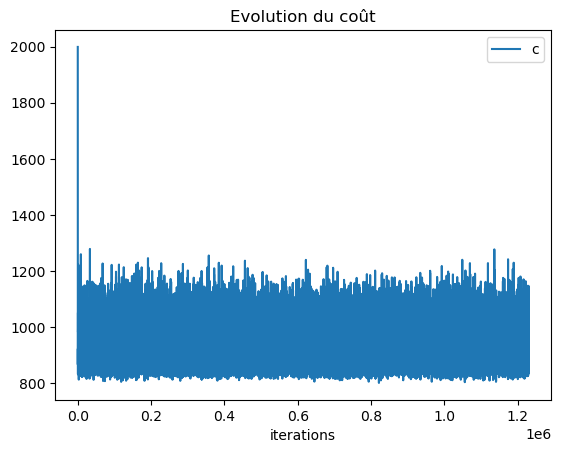

In [49]:
#Coût
Cout=evolCout(allw_biais)
plt.figure()
plt.plot(Cout)
plt.title('Evolution du coût')
plt.xlabel('iterations')
plt.legend('coût')

Nous remarquons de le coût diminue au fur et a mesure de la mise a jour du vecteur W, pour enfin stagner a une valeur de 1000,
Enn effet quand $w=[0,0]$ à le coût est élevé. L'évolions des poids du modèle parmet d' aller dans une zone de l'espace où le coût est moindre.

# **Expérimentation data 5D**

In [50]:
#Data 5D
# lecture des donnéees en dimension 5 dans un dataframe pandas
data5D = pkl.load(open('data-projet/data-5D.pkl', 'rb')) 
X5D = np.array(data5D[['x1', 'x2', 'x3', 'x4', 'x5']], dtype=float) # conversion de type pour une meilleure compatibilité
Y5D = np.array(data5D['label'], dtype=float)

#Mélange 
index = np.random.permutation(len(X5D))
X5DMelange = X5D[index]
Y5DMelange = Y5D[index]


## **Classifier KNN**


In [51]:
index = np.random.permutation(len(X5D)) # mélange des index
X5DMelange = X5D[index]
Y5DMelange = Y5D[index]

dimension = 5 
nbr_iteration = 10
seuil_k =len(X5D) //2

valeurs_k = [k for k in range(1,seuil_k,20)]

accuracies5D_moy= []
accuracies5D_ecart= []
temps_execution5D=[]

# Pour avoir le temps d'exection
start1 = time.time()

print(" KNN Classifier : \n")
for k in valeurs_k:
    occur  = []
    classifierKNN = ClassifierKNN(dimension,k)
    temps_execution5D_bis = []
    for i in range(nbr_iteration):
        start = time.time()
        print("Pour k = ",k, " Iterration numero: ", i)

        Xapp,Yapp,Xtest,Ytest = crossval_strat(X5DMelange, Y5DMelange, nbr_iteration, i)
        classifierKNN.train(Xapp, Yapp)
        occur.append(classifierKNN.accuracy(Xtest, Ytest))
        temps_execution5D_bis.append(time.time()-start)
    moyenne = np.mean(occur)
    ecart = np.var(occur)
    print("-------Pour k = ",k, "La moyenne des accuracy est de : ", moyenne,"------")
    print("-------Pour k = ",k, "L ecart type des accuracy est de : ", ecart,"------")
    accuracies5D_moy.append(moyenne)
    accuracies5D_ecart.append(ecart)
    temps_execution5D.append(np.mean(temps_execution5D_bis))


print("Durée total d'execution de l'algo:", time.time()-start1)



 KNN Classifier : 

Pour k =  1  Iterration numero:  0
Pour k =  1  Iterration numero:  1
Pour k =  1  Iterration numero:  2
Pour k =  1  Iterration numero:  3
Pour k =  1  Iterration numero:  4
Pour k =  1  Iterration numero:  5
Pour k =  1  Iterration numero:  6
Pour k =  1  Iterration numero:  7
Pour k =  1  Iterration numero:  8
Pour k =  1  Iterration numero:  9
-------Pour k =  1 La moyenne des accuracy est de :  0.8525 ------
-------Pour k =  1 L ecart type des accuracy est de :  0.0004112500000000007 ------
Pour k =  21  Iterration numero:  0
Pour k =  21  Iterration numero:  1
Pour k =  21  Iterration numero:  2
Pour k =  21  Iterration numero:  3
Pour k =  21  Iterration numero:  4
Pour k =  21  Iterration numero:  5
Pour k =  21  Iterration numero:  6
Pour k =  21  Iterration numero:  7
Pour k =  21  Iterration numero:  8
Pour k =  21  Iterration numero:  9
-------Pour k =  21 La moyenne des accuracy est de :  0.8844999999999998 ------
-------Pour k =  21 L ecart type des ac

-------Pour k =  301 La moyenne des accuracy est de :  0.883 ------
-------Pour k =  301 L ecart type des accuracy est de :  0.00042600000000000076 ------
Pour k =  321  Iterration numero:  0
Pour k =  321  Iterration numero:  1
Pour k =  321  Iterration numero:  2
Pour k =  321  Iterration numero:  3
Pour k =  321  Iterration numero:  4
Pour k =  321  Iterration numero:  5
Pour k =  321  Iterration numero:  6
Pour k =  321  Iterration numero:  7
Pour k =  321  Iterration numero:  8
Pour k =  321  Iterration numero:  9
-------Pour k =  321 La moyenne des accuracy est de :  0.8830000000000002 ------
-------Pour k =  321 L ecart type des accuracy est de :  0.00031100000000000057 ------
Pour k =  341  Iterration numero:  0
Pour k =  341  Iterration numero:  1
Pour k =  341  Iterration numero:  2
Pour k =  341  Iterration numero:  3
Pour k =  341  Iterration numero:  4
Pour k =  341  Iterration numero:  5
Pour k =  341  Iterration numero:  6
Pour k =  341  Iterration numero:  7
Pour k =  3

Pour k =  641  Iterration numero:  1
Pour k =  641  Iterration numero:  2
Pour k =  641  Iterration numero:  3
Pour k =  641  Iterration numero:  4
Pour k =  641  Iterration numero:  5
Pour k =  641  Iterration numero:  6
Pour k =  641  Iterration numero:  7
Pour k =  641  Iterration numero:  8
Pour k =  641  Iterration numero:  9
-------Pour k =  641 La moyenne des accuracy est de :  0.8779999999999999 ------
-------Pour k =  641 L ecart type des accuracy est de :  0.00037100000000000067 ------
Pour k =  661  Iterration numero:  0
Pour k =  661  Iterration numero:  1
Pour k =  661  Iterration numero:  2
Pour k =  661  Iterration numero:  3
Pour k =  661  Iterration numero:  4
Pour k =  661  Iterration numero:  5
Pour k =  661  Iterration numero:  6
Pour k =  661  Iterration numero:  7
Pour k =  661  Iterration numero:  8
Pour k =  661  Iterration numero:  9
-------Pour k =  661 La moyenne des accuracy est de :  0.8785000000000001 ------
-------Pour k =  661 L ecart type des accuracy e

Pour k =  961  Iterration numero:  1
Pour k =  961  Iterration numero:  2
Pour k =  961  Iterration numero:  3
Pour k =  961  Iterration numero:  4
Pour k =  961  Iterration numero:  5
Pour k =  961  Iterration numero:  6
Pour k =  961  Iterration numero:  7
Pour k =  961  Iterration numero:  8
Pour k =  961  Iterration numero:  9
-------Pour k =  961 La moyenne des accuracy est de :  0.8744999999999999 ------
-------Pour k =  961 L ecart type des accuracy est de :  0.0003722500000000007 ------
Pour k =  981  Iterration numero:  0
Pour k =  981  Iterration numero:  1
Pour k =  981  Iterration numero:  2
Pour k =  981  Iterration numero:  3
Pour k =  981  Iterration numero:  4
Pour k =  981  Iterration numero:  5
Pour k =  981  Iterration numero:  6
Pour k =  981  Iterration numero:  7
Pour k =  981  Iterration numero:  8
Pour k =  981  Iterration numero:  9
-------Pour k =  981 La moyenne des accuracy est de :  0.8745 ------
-------Pour k =  981 L ecart type des accuracy est de :  0.00

La valeur optimale de k est de : 41


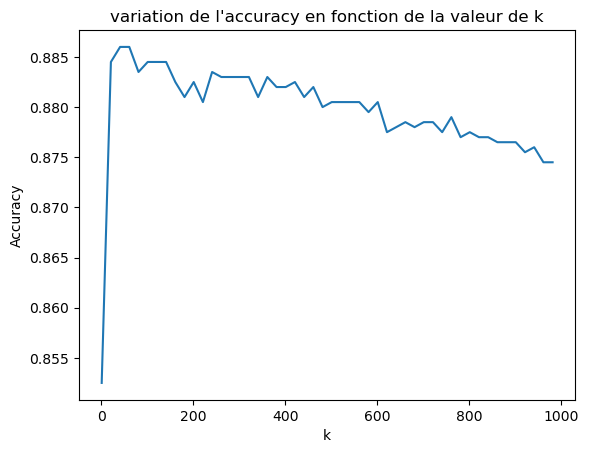

In [52]:
# Tracer le graphe de variation des accuracies
k_optimal = accuracies5D_moy.index(max(accuracies5D_moy))*20+1
print("La valeur optimale de k est de : "+str(k_optimal))
plt.plot(valeurs_k, accuracies5D_moy)  
plt.ylabel('Accuracy')
plt.xlabel("k")
plt.title("variation de l'accuracy en fonction de la valeur de k")
plt.show()

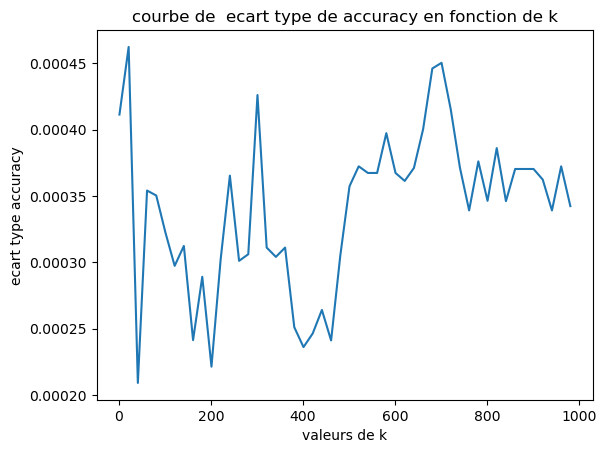

In [53]:
#tracage courbe de ecart type des accuracy en fonction de k 
plt.plot(valeurs_k,accuracies5D_ecart)  
plt.ylabel('ecart type accuracy')
plt.xlabel("valeurs de k")
plt.title('courbe de  ecart type de accuracy en fonction de k')
plt.show()

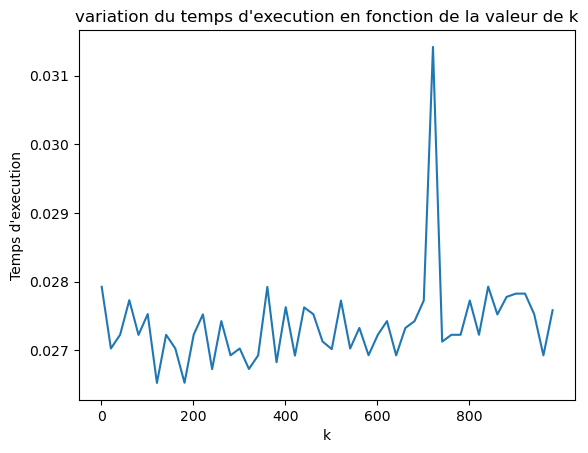

In [54]:
# Tracer le graphe du temps d'execution pour chaque k

plt.plot(valeurs_k,temps_execution5D )  
plt.ylabel('Temps d\'execution')
plt.xlabel("k")
plt.xticks(np.arange(0, seuil_k, step=200))

plt.title("variation du temps d'execution en fonction de la valeur de k")
plt.show()

##**2.   Analyse des graphes précédents**


*  **Selon le taux de bonne classification :**


Nous remarquons que notre courbe est décroissante ,

> Si k est trop grand, le modèle devient trop général et n'est donc en mesure de capturer des motifs plus fins dans nes données (Moins precis) .

> Si k est trop petit, le modèle est dit très sensible au bruit et aux valeurs aberrantes dans nos données d'entraînement, ce qui peut conduire à un surapprentissage. 

> D'apres nos experimentation la valeur optimale de k enregistrée est de *61* .

*   **Selon le temps d'éxécution :**

Nous remarquons  que la courbe de temps prends des valeurs importantes quand le k est trop grand,

> Plus k est grand plus le temps d'éxécution du KNN est élevé, car il est nécessaire de rechercher et de trier un plus grand nombre de voisins potentiels.


## **Classifier Perceptron**

### **Perceptron vecteur initilisé à nul**

In [55]:
#Accuracy, Ecart-type et CPU time
np.random.seed(42) 

learning_rate_list = np.linspace(0.001, 0.01, 100)

dict_lr_acc_5D = {}
dict_lr_et_5D  = {}
dict_lr_time_5D= {}

for lr in learning_rate_list :
  list_accuracy = []
  start_time = time.time()
  for i in range(niter):
      Xapp,Yapp,Xtest,Ytest = crossval_strat(X5DMelange, Y5DMelange, niter, i)
      perceptron5 = ClassifierPerceptron(5, lr, init=True)
      
      perceptron5.train(Xapp, Yapp)
      list_accuracy.append(perceptron5.accuracy(Xtest, Ytest))
    
  end_time = time.time()
  dict_lr_time_5D[lr] = end_time - start_time

  dict_lr_acc_5D[lr], dict_lr_et_5D[lr] = analyse_perfs(list_accuracy)


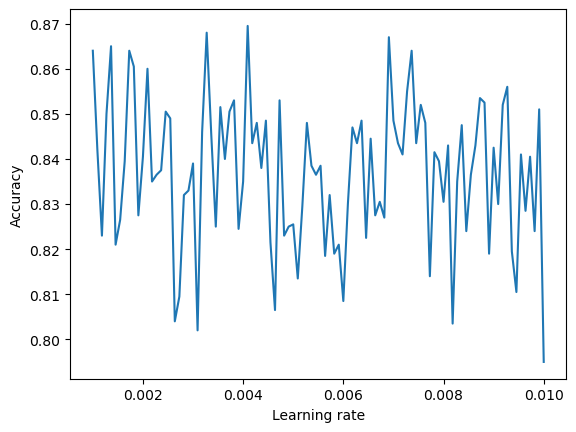

In [56]:
# Accuracy en fonction du learning rate
plt.plot( dict_lr_acc_5D.keys() , dict_lr_acc_5D.values())
plt.ylabel("Accuracy")
plt.xlabel("Learning rate")
plt.show()

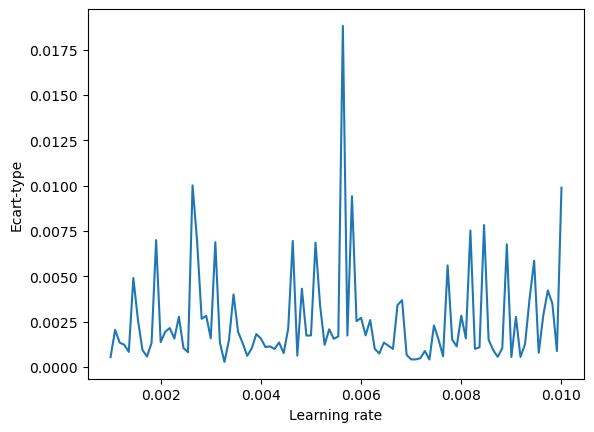

In [57]:
# Ecart-type en fonction du learning rate
plt.plot( dict_lr_et_5D.keys() , dict_lr_et_5D.values())
plt.ylabel("Ecart-type")
plt.xlabel("Learning rate")
plt.show()

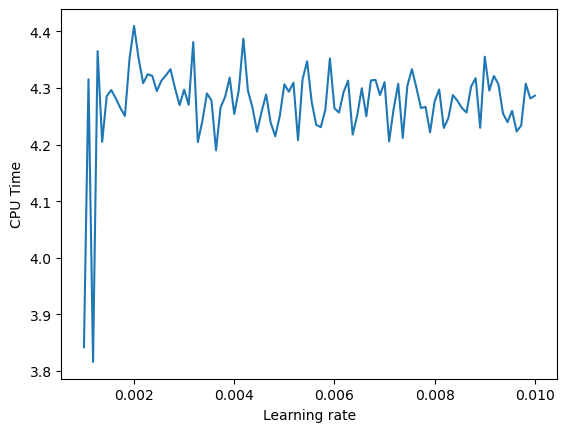

In [58]:
# CPU Time
plt.plot( dict_lr_time_5D.keys() , dict_lr_time_5D.values())
plt.ylabel("CPU Time")
plt.xlabel("Learning rate")
plt.show()

In [59]:
# Le Poids
lr = max(dict_lr_acc_5D, key=dict_lr_acc_5D.get)
print(lr)

0.004090909090909091


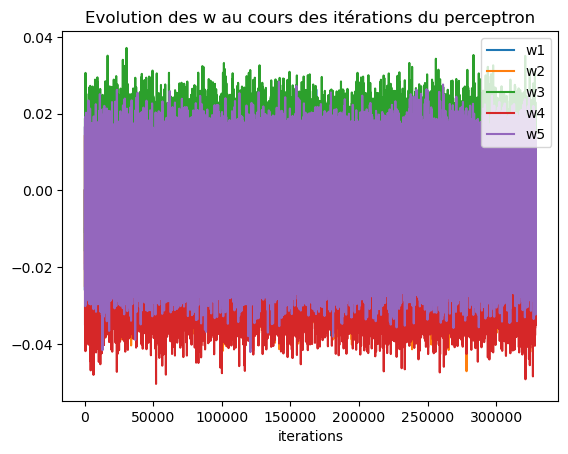

In [60]:
perceptron = ClassifierPerceptron(5, learning_rate=lr, init=True)

les_differences = perceptron.train(X5DMelange, Y5DMelange ,nb_max=1000)

# récupération de l'évolution des w au cours de l'apprentissage 
# perceptron initialisé à 0
# si allw est sous forme de liste de couples [w1, w2], on doit la convertir en np.array pour la suite:
allw = np.array(perceptron.get_allw()) 
# print(allw)

# Tracé de l'évolution des w:
plt.figure()
plt.plot(allw[:,0]) # première coordonnée du vecteur poids: w1
plt.plot(allw[:,1]) # deuxième coordonnée du vecteur poids: w2
plt.plot(allw[:,2]) # deuxième coordonnée du vecteur poids: w3
plt.plot(allw[:,3]) # deuxième coordonnée du vecteur poids: w4
plt.plot(allw[:,4]) # deuxième coordonnée du vecteur poids: w5
plt.title('Evolution des w au cours des itérations du perceptron')
plt.xlabel('iterations')
plt.legend(['w1','w2','w3','w4','w5'])

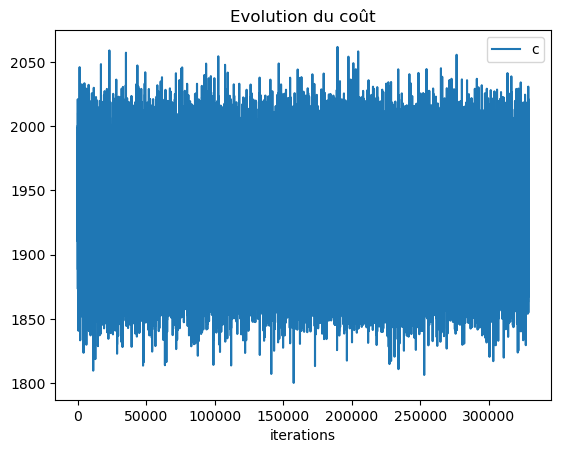

In [61]:
def calculCout(w):
  c=0
  for i in range(len(X5DMelange)):
    fx = np.dot(X5DMelange[i],w)
    if (1-fx*Y5DMelange[i]) > 0 :
      c=c+(1-fx*Y5DMelange[i])
  return c


def evolCout(allw):
  cout=[]
  for i in range(len(allw)):
    w=allw[i].copy()
    couti = calculCout(w)
    cout.append(couti)
  return cout

Cout=evolCout(allw)
plt.figure()
plt.plot(Cout)
plt.title('Evolution du coût')
plt.xlabel('iterations')
plt.legend('coût')

### **Perceptron vecteur initialisé non nul**

In [62]:
#Accuracy, Ecart-type et CPU time
np.random.seed(42) 

learning_rate_list = np.linspace(0.001, 0.01, 100)

dict_lr_acc_5D = {}
dict_lr_et_5D  = {}
dict_lr_time-5D= {}

for lr in learning_rate_list :
  list_accuracy = []
  start_time = time.time()
  for i in range(niter):
      Xapp,Yapp,Xtest,Ytest = crossval_strat(X5DMelange, Y5DMelange, niter, i)
      perceptron5 = ClassifierPerceptron(5, lr, init=False)
      
      perceptron5.train(Xapp, Yapp)
      list_accuracy.append(perceptron5.accuracy(Xtest, Ytest))
    
  end_time = time.time()
  dict_lr_time_5D[lr] = end_time - start_time

  dict_lr_acc_5D[lr], dict_lr_et_5D[lr] = analyse_perfs(list_accuracy)


SyntaxError: invalid syntax (2208993013.py, line 8)

In [ ]:
# Accuracy en fonction du learning rate
plt.plot( dict_lr_acc_5D.keys() , dict_lr_acc_5D.values())
plt.ylabel("Accuracy")
plt.xlabel("Learning rate")
plt.show()

In [ ]:
# Ecart-type en fonction du learning rate
plt.plot( dict_lr_et_5D.keys() , dict_lr_et_5D.values())
plt.ylabel("Ecart-type")
plt.xlabel("Learning rate")
plt.show()

In [ ]:
# CPU Time
plt.plot( dict_lr_time_5D.keys() , dict_lr_time_5D.values())
plt.ylabel("CPU Time")
plt.xlabel("Learning rate")
plt.show()

In [ ]:
# Le Poids
lr = max(dict_lr_acc_5D, key=dict_lr_acc_5D.get)
print(lr)

In [ ]:
perceptron = ClassifierPerceptron(5, learning_rate=lr, init=False)

les_differences = perceptron.train(X5DMelange, Y5DMelange ,nb_max=1000)

# récupération de l'évolution des w au cours de l'apprentissage 
# perceptron initialisé à 0
# si allw est sous forme de liste de couples [w1, w2], on doit la convertir en np.array pour la suite:
allw = np.array(perceptron.get_allw()) 
# print(allw)

# Tracé de l'évolution des w:
plt.figure()
plt.plot(allw[:,0]) # première coordonnée du vecteur poids: w1
plt.plot(allw[:,1]) # deuxième coordonnée du vecteur poids: w2
plt.plot(allw[:,2]) # deuxième coordonnée du vecteur poids: w3
plt.plot(allw[:,3]) # deuxième coordonnée du vecteur poids: w4
plt.plot(allw[:,4]) # deuxième coordonnée du vecteur poids: w5
plt.title('Evolution des w au cours des itérations du perceptron')
plt.xlabel('iterations')
plt.legend(['w1','w2','w3','w4','w5'])

In [ ]:
Cout=evolCout(allw)
plt.figure()
plt.plot(Cout)
plt.title('Evolution du coût')
plt.xlabel('iterations')
plt.legend('coût')

## **Classifier Perceptron Biais**

### **Perceptrons Biais vecteur initialisé à nul**

In [ ]:
#Accuracy, Ecart-type et CPU time
np.random.seed(42) 

learning_rate_list = np.linspace(0.001, 0.01, 100)

dict_lr_acc_biais_5D = {}
dict_lr_et_biais_5D  = {}
dict_lr_time_biais_5D= {}

for lr in learning_rate_list :
  list_accuracy = []
  start_time = time.time()
  for i in range(niter):
      Xapp,Yapp,Xtest,Ytest = crossval_strat(X5DMelange, Y5DMelange, niter, i)
      perceptronb_5D = ClassifierPerceptronBiais(5, lr, init=True)
      
      perceptronb_5D.train(Xapp, Yapp)
      list_accuracy.append(perceptronb_5D.accuracy(Xtest, Ytest))
    
  end_time = time.time()
  dict_lr_time_biais_5D[lr] = end_time - start_time

  dict_lr_acc_biais_5D[lr], dict_lr_et_biais_5D[lr] = analyse_perfs(list_accuracy)


In [ ]:
# Accuracy 
plt.plot( dict_lr_acc_biais_5D.keys() , dict_lr_acc_biais_5D.values())
plt.ylabel("Accuracy")
plt.xlabel("Learning rate")
plt.show()

In [ ]:
# Ecart-type en fonction du learning rate
plt.plot( dict_lr_et_biais_5D.keys() , dict_lr_et_biais_5D.values())
plt.ylabel("Ecart-type")
plt.xlabel("Learning rate")
plt.show()

In [ ]:
# CPU Time
plt.plot( dict_lr_time_biais_5D.keys() , dict_lr_time_biais_5D.values())
plt.ylabel("CPU Time")
plt.xlabel("Learning rate")
plt.show()

In [ ]:
# Le Poids 
lr_biais = max(dict_lr_acc_biais_5D, key=dict_lr_acc_biais_5D.get)
print(lr_biais)

In [ ]:
perceptron_biais = ClassifierPerceptronBiais(5, learning_rate=lr_biais, init=True)

les_differences = perceptron_biais.train(X5DMelange, Y5DMelange ,nb_max=1000)

# récupération de l'évolution des w au cours de l'apprentissage 
# perceptron initialisé à 0
# si allw est sous forme de liste de couples [w1, w2], on doit la convertir en np.array pour la suite:
allw_biais = np.array(perceptron_biais.get_allw()) 
# print(allw)

# Tracé de l'évolution des w:
plt.figure()
plt.plot(allw_biais[:,0]) # première coordonnée du vecteur poids: w1
plt.plot(allw_biais[:,1]) # deuxième coordonnée du vecteur poids: w2
plt.plot(allw_biais[:,2]) # deuxième coordonnée du vecteur poids: w3
plt.plot(allw_biais[:,3]) # deuxième coordonnée du vecteur poids: w4
plt.plot(allw_biais[:,4]) # deuxième coordonnée du vecteur poids: w5
plt.title('Evolution des w au cours des itérations du perceptron')
plt.xlabel('iterations')
plt.legend(['w1','w2','w3','w4','w5'])

In [ ]:
# Le Coût
Cout=evolCout(allw)
plt.figure()
plt.plot(Cout)
plt.title('Evolution du coût')
plt.xlabel('iterations')
plt.legend('coût')

### **Perceptrons Biais vecteur initialisé non nul**

In [ ]:
#Accuracy, Ecart-type et CPU time
np.random.seed(42) 

learning_rate_list = np.linspace(0.001, 0.01, 100)

dict_lr_acc_biais_5D = {}
dict_lr_et_biais_5D  = {}
dict_lr_time_biais_5D= {}

for lr in learning_rate_list :
  list_accuracy = []
  start_time = time.time()
  for i in range(niter):
      Xapp,Yapp,Xtest,Ytest = crossval_strat(X5DMelange, Y5DMelange, niter, i)
      perceptronb_5D = ClassifierPerceptronBiais(5, lr, init=False)
      
      perceptronb_5D.train(Xapp, Yapp)
      list_accuracy.append(perceptronb_5D.accuracy(Xtest, Ytest))
    
  end_time = time.time()
  dict_lr_time_biais_5D[lr] = end_time - start_time

  dict_lr_acc_biais_5D[lr], dict_lr_et_biais_5D[lr] = analyse_perfs(list_accuracy)


In [ ]:
# Accuracy 
plt.plot( dict_lr_acc_biais_5D.keys() , dict_lr_acc_biais_5D.values())
plt.ylabel("Accuracy")
plt.xlabel("Learning rate")
plt.show()

In [ ]:
# Ecart-type en fonction du learning rate
plt.plot( dict_lr_et_biais_5D.keys() , dict_lr_et_biais_5D.values())
plt.ylabel("Ecart-type")
plt.xlabel("Learning rate")
plt.show()

In [ ]:
# CPU Time
plt.plot( dict_lr_time_biais_5D.keys() , dict_lr_time_biais_5D.values())
plt.ylabel("CPU Time")
plt.xlabel("Learning rate")
plt.show()

In [ ]:
# Le Poids 
lr_biais = max(dict_lr_acc_biais_5D, key=dict_lr_acc_biais_5D.get)
print(lr_biais)

In [ ]:
perceptron_biais = ClassifierPerceptronBiais(5, learning_rate=lr_biais, init=False)

les_differences = perceptron_biais.train(X5DMelange, Y5DMelange ,nb_max=1000)

# récupération de l'évolution des w au cours de l'apprentissage 
# perceptron initialisé à 0
# si allw est sous forme de liste de couples [w1, w2], on doit la convertir en np.array pour la suite:
allw_biais = np.array(perceptron_biais.get_allw()) 
# print(allw)

# Tracé de l'évolution des w:
plt.figure()
plt.plot(allw_biais[:,0]) # première coordonnée du vecteur poids: w1
plt.plot(allw_biais[:,1]) # deuxième coordonnée du vecteur poids: w2
plt.plot(allw_biais[:,2]) # deuxième coordonnée du vecteur poids: w3
plt.plot(allw_biais[:,3]) # deuxième coordonnée du vecteur poids: w4
plt.plot(allw_biais[:,4]) # deuxième coordonnée du vecteur poids: w5
plt.title('Evolution des w au cours des itérations du perceptron')
plt.xlabel('iterations')
plt.legend(['w1','w2','w3','w4','w5'])

In [ ]:
# Le Coût
Cout=evolCout(allw)
plt.figure()
plt.plot(Cout)
plt.title('Evolution du coût')
plt.xlabel('iterations')
plt.legend('coût')

1. KNN :

>*Nous avons observé que le taux de classification correcte est plus élevé sur les données d'apprentissage. Pour déterminer le >*choix optimal de K, nous devons prendre en compte deux cas :

>>*Si K est trop petit, le modèle sera plus sensible aux valeurs aberrantes, ce qui augmentera la variance.
>>*Si K est trop grand, le modèle sera moins sensible aux caractéristiques de l'ensemble de données, ce qui augmentera l'erreur de biais.
>*Le temps d'exécution de notre classifieur KNN dépend directement du nombre de voisins K. Lorsque K est petit, l'algorithme est plus rapide car il utilise moins de voisins. Plus K est grand, plus le temps d'exécution est long. Cela est dû au fait que pour chaque point, l'algorithme doit trouver les K voisins les plus proches, ce qui peut être coûteux en temps pour les grands ensembles de données.

2. Perceptron :

>>* Un taux d'apprentissage élevé peut accélérer la convergence de l'algorithme, mais peut également causer la divergence si la taille des mises à jour est trop grande. D'autre part, un taux d'apprentissage faible peut ralentir la convergence de l'algorithme, mais peut garantir la convergence si la taille des mises à jour est suffisamment petite.

3. Perceptron biais :

>>* Notre expérience a montré que lorsqu'un taux d'apprentissage est trop élevé, la convergence est rapide, mais la descente de gradient peut osciller autour du minimum, ce qui peut conduire à des performances sous-optimales. D'un autre côté, un taux d'apprentissage trop faible peut entraîner une convergence lente, qui peut être très coûteuse en temps d'exécution. Il est donc important de trouver un taux d'apprentissage approprié qui permette une convergence rapide et stable. Nous avons essayé de trouver ce taux d'apprentissage pour différents jeux de données.

>>* Nous avons également remarqué que la performance du perceptron biais dépend des caractéristiques des données d'entrée et de la complexité du problème de classification. Dans notre cas, pour les données de 2D et 5D, le perceptron biais a montré de meilleures performances sur les données de 2D. En revanche, le classifieur KNN était plus performant sur les données de 5D. Nous en concluons que les perceptrons sont performants pour les données de petite taille, tandis que le KNN est meilleur pour des données plus complexes (5 dimensions dans notre cas).